<a href="https://colab.research.google.com/github/Juanjor17/Coderhouse/blob/main/ProyectoDS_parteI_%2BRestrepo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from numpy import arange
%cd '/content/drive/MyDrive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
# Base de daros de la indstria de motos Colombianas del 2023
co_data_23 = pd.read_excel('base Runt 2023.xlsx', sheet_name='Sheet1')
co = pd.DataFrame(co_data_23)

In [ ]:
# Base de daros de la indstria de motos Colombianas del 2022
co_data_22 = pd.read_excel('base Runt 2022.xlsx', sheet_name='Hoja1')
co22 = pd.DataFrame(co_data_22)

Este dataset muestra la información relevante del mercado de motocicletas en Colombia para el 2023 y el 2022. A continuación planteo las preguntas de interés para el proyecto: 

- Existe algun tipo de correlacion entre las ventas y los dias del mes? (Esto permite entender si se deben realizar actividades externas al prinicipio, mediados o finales de mes).

- Cómo es la evolución de los segmentos?, hay algun numero que resalte entre las marcas? como es el comportamiento del mercado y los competidores? (Permite entender la naturaleza del mercado y donde contra quien se compite en cada uno de ellos?

- Como es la distribución por zonas / ciudades de cada marca? cuales son las ciudades donde más se venden motos? existe alguna correlacion entre las marcas y las ciudades? (Esto permite entender donde es fuerte la marca, y donde debe mejorar su competitividad, entendiendo que cada ciudad tiene una población determinada, unas preferencias en tipos de motos y unas marcas son más fuertes que otras en ciertos lugares). 


In [ ]:
print(co.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113950 entries, 0 to 113949
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   AÑO MI                         113950 non-null  int64         
 1   MES MI                         113950 non-null  int64         
 2   DIA MI                         113950 non-null  int64         
 3   CLASE                          113950 non-null  object        
 4   MARCA                          113950 non-null  object        
 5   MARCA COMERCIAL                113950 non-null  object        
 6   LINEA                          113950 non-null  object        
 7   LINEA COMERCIAL                113950 non-null  object        
 8   MODELO                         113950 non-null  int64         
 9   COLOR                          113950 non-null  object        
 10  SEGMENTO COMERCIAL             113950 non-null  object        
 11  

<AxesSubplot:xlabel='DIA MI', ylabel='MES MI'>

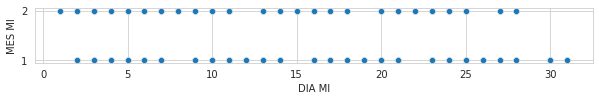

In [ ]:
fig, ax = plt.subplots(figsize = (10, 1))
sns.scatterplot(data=co, y="MES MI", x="DIA MI", ax = ax)

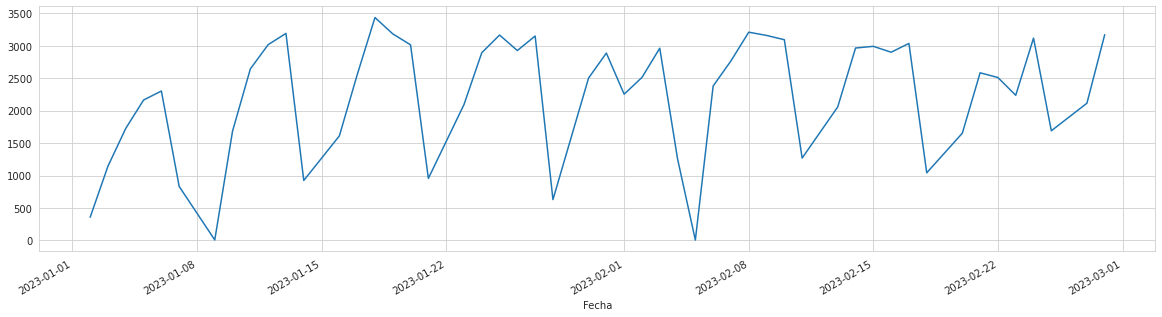

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
count_categoria = co.groupby('Fecha').count()['MATRICULA']
 
count_categoria.plot(ax = ax)
plt.show()

Analisis: De acuerdo al grafico, no todos los dias se registran ventas de motos nuevas. Existen dias en que no se registra nada. Con la información disponible, es posible asumir que en los domingos y festivos no se registran ventas de motos. 

En este grafico se pueden observar las ventas totales de motos por dia.

 Si comparamos el comportamiento de los ultimos 10 dias del mes, se puede observar que en esos dias se vende más, pues tiene picos más altos en comparación a los primeros 20 dias del mes, por lo cual se le puede recomendar al equipo de ventas y marketing realizar acciones especificas para los 10 dias finales del mes.

<AxesSubplot:xlabel='count', ylabel='SEGMENTO COMERCIAL'>

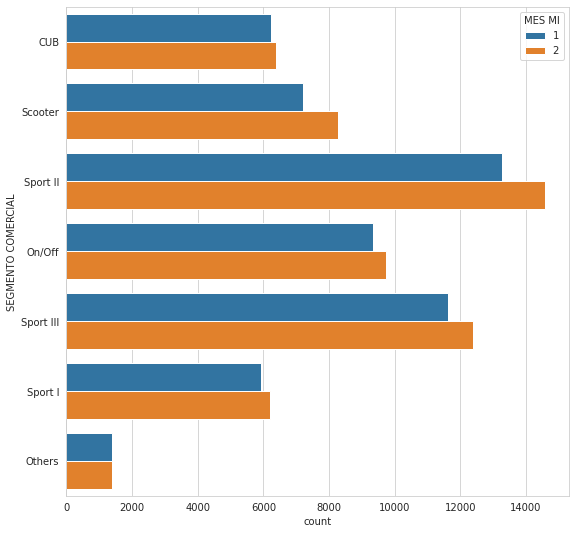

In [ ]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.countplot(y= co['SEGMENTO COMERCIAL'], hue = co['MES MI'],ax = ax)

Analisis: En lo que va del año se puede observar que los segmentos Sport II y Sport III son los más representativos en ventas. En febrero se observa un incremetno en las ventas de la mayoría de segmentos, a excepción de CUB y Sport I que mantienen volumenes muy cercanos a los del mes pasado. 

Como complemento, quiero resaltar que estos dos segmentos son los más económicos del mercado, lo que refleja la situación económica complciada para los usuarios que buscan motos más baratas. 


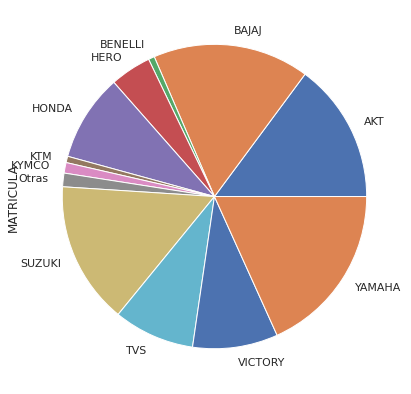

In [ ]:
datos = co.groupby('MARCA COMERCIAL').count()['MATRICULA']
fig,ax= plt.subplots(figsize = (10,7))
datos.plot.pie()
plt.show()

Analisis: En este grafico de pie se observa que la mayor parte del mercado lo tiene Bajaj y Yamaha, las marcas lideres en ventas del mercado, seguidas por AKT, Suzuki y Honda.

#Analisis por marcas:

<AxesSubplot:>

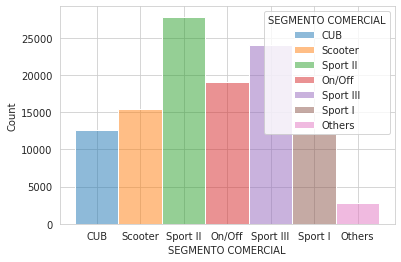

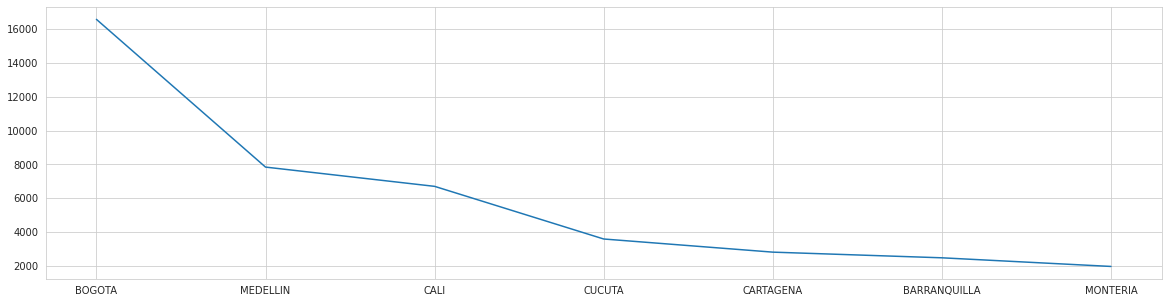

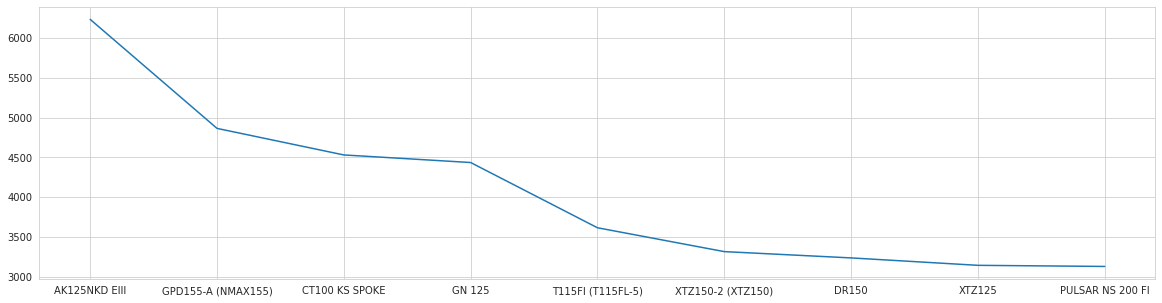

In [ ]:
sns.set_style("whitegrid")
sns.histplot(data=co, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Market_Top_town = co['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Market_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Market_Top_models = co['LINEA'].value_counts()[:9]
Market_Top_models.plot(ax = ax)

Las ciudaes más representativas del mercado son Bogotá (Capital de Colombia), Medelin, Cali, Cucuta, Cartagena, Barrranquilla y Monteria. 

A nivel de modelos (referencias de motocicletas), la Más vendida en Colombia es la NKD125 de AKT, seguida porla Nmax de Yamaha y la Boxer CT100 de Bajaj. De estos tres modelos resalta la Nmax, una motocicleta con un precio mucho mnayor a las otras dos, y sin embargo maneja los mismos volúmenes de una de las motos más economicas del mercado, la Boxer CT100
 

<AxesSubplot:>

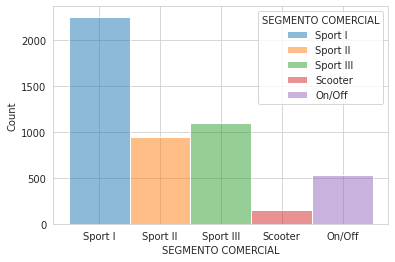

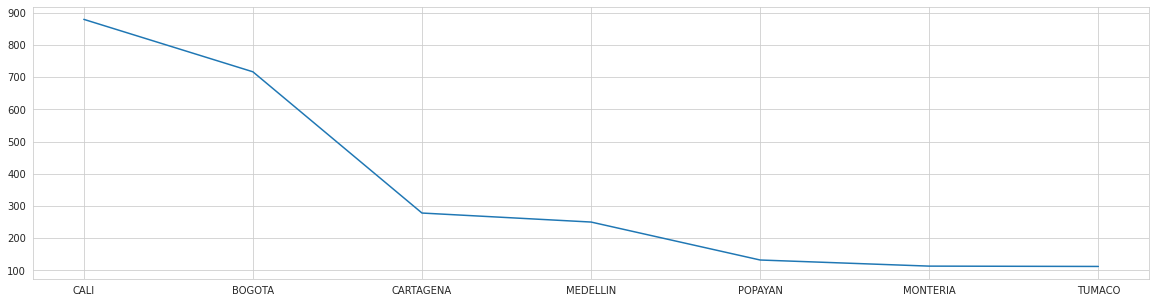

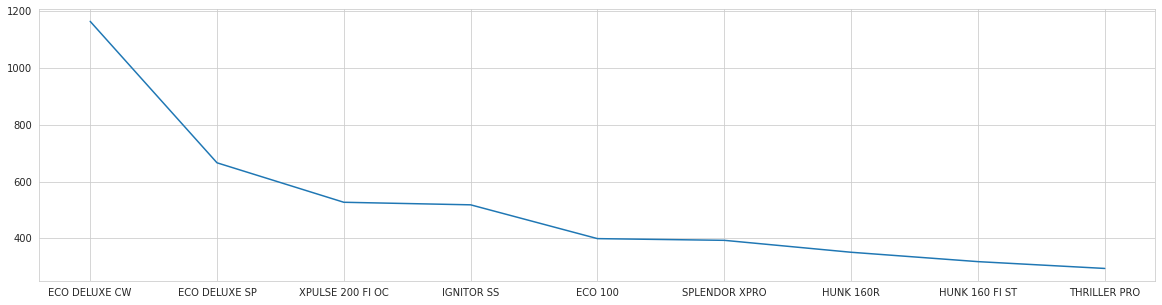

In [ ]:
Hero_sales = co.query("MARCA == 'HERO'")
sns.set_style("whitegrid")
sns.histplot(data=Hero_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Hero_Top_town = Hero_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Hero_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Hero_Top_models = Hero_sales['LINEA'].value_counts()[:9]
Hero_Top_models.plot(ax = ax)


La marca Hero tiene la mayoría de sus ventas en el segmento Sport I, el más económico del mercado (motos de trabajo). A nivel de ciudad se observa que, a diferencia del mercado, Cali es la ciudad más importante para esta marca, seguida por Bogotá (la que más motos vende en el mercado). 

Los modelos más representativos para la marca son la Eco Deluxe en sus dos versiones (CW, SP), seguido por la Xpulse 200 y la Ignitor que estan en el mismo nivel de ventas

<AxesSubplot:>

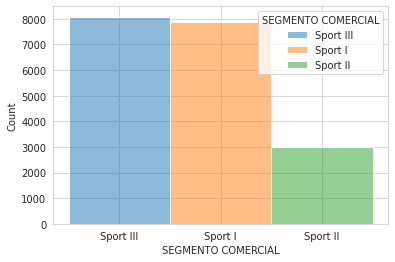

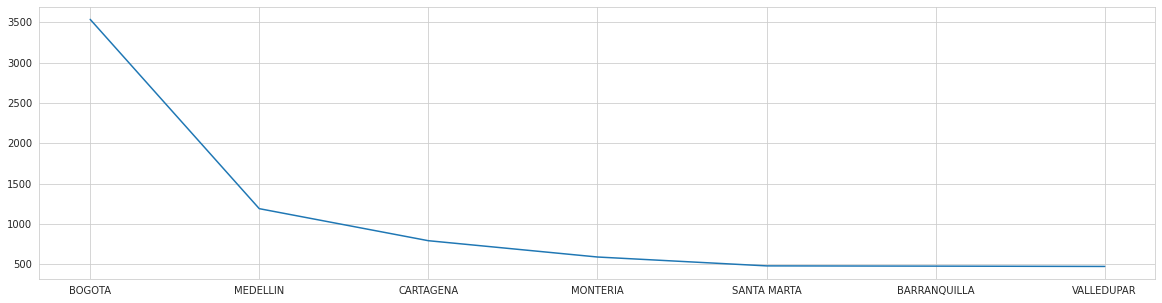

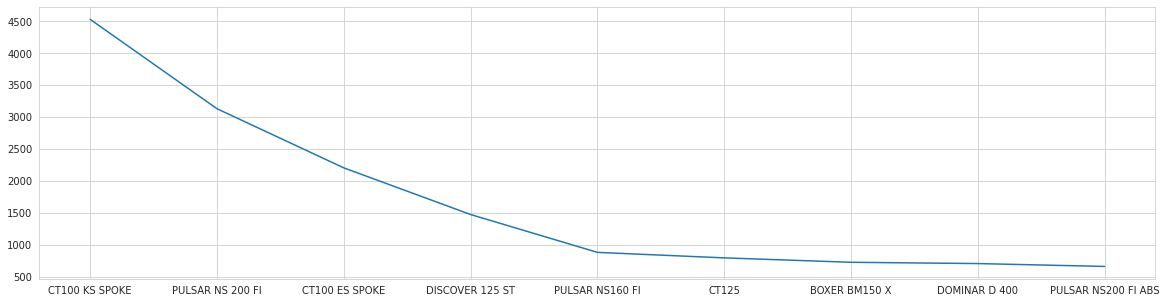

In [ ]:
Bajaj_sales = co.query("MARCA == 'BAJAJ'")

sns.histplot(data=Bajaj_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Bajaj_Top_town = Bajaj_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Bajaj_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Bajaj_Top_models = Bajaj_sales['LINEA'].value_counts()[:9]
Bajaj_Top_models.plot(ax = ax)

Bajaj, la marca lider de mercado tiene motos en solo 3 segmentos. El segmento Sport I es donde mas motos vende, con sus modelos de 100CC, (Boxer) seguido por sus modelos Sport III, prinicipalmente en el ilindraje de 200cc.

Los modelos más representativos de Bajaj son la Ct100 KS, seguido por la Pulsar 200 y la CT100 ES. 

El top 5 de ciudades donde mas se venden motocicletas son Bogota, Medellin,Cartagena y Montería. De sus 7 ciudades más improtantes, 5 estan en la zona norte (Costa) del país.

<AxesSubplot:>

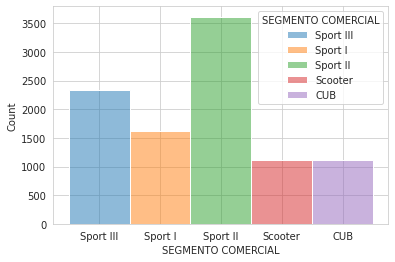

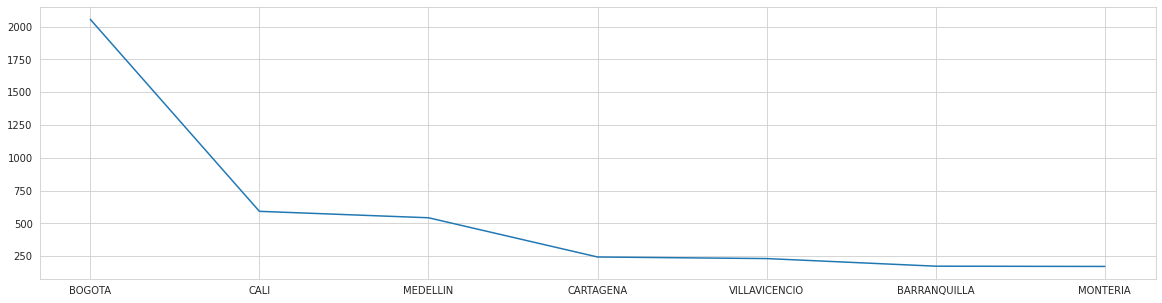

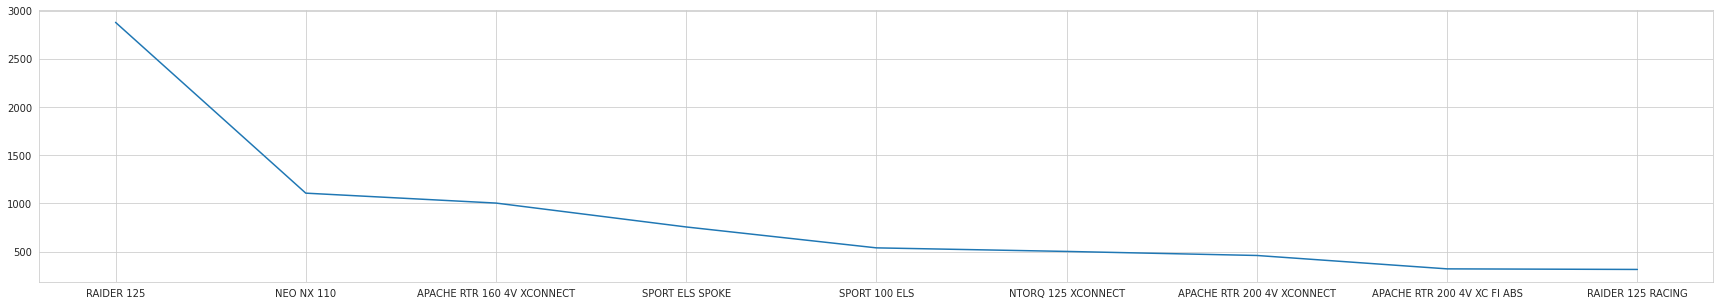

In [ ]:
Tvs_sales = co.query("MARCA == 'TVS'")

sns.histplot(data=Tvs_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Tvs_Top_town = Tvs_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Tvs_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (30,5))
Tvs_Top_models = Tvs_sales['LINEA'].value_counts()[:9]
Tvs_Top_models.plot(ax = ax)

TVS es una marca con una gran participación en el segmento Sport II, gracias al resultado de la Raider 125 (su motocicleta más vendida actualmente). 

a nivel de ventas por ciudad se observa que Bogotá es su plaza más importante, seguida por Cali y Medellín, las tres ciudades más importantes a nivel de mercado.

<AxesSubplot:>

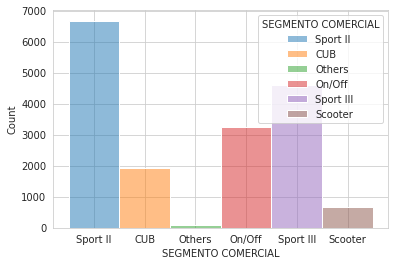

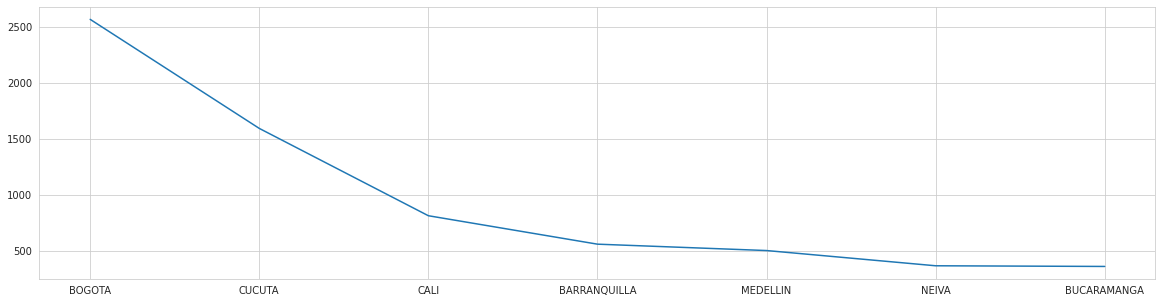

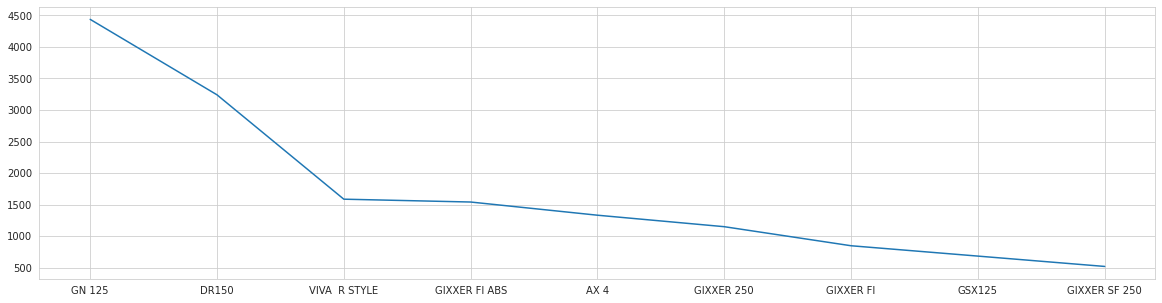

In [ ]:
Suzuki_sales = co.query("MARCA == 'SUZUKI'")

sns.histplot(data=Suzuki_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Suzuki_Top_town = Suzuki_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Suzuki_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Suzuki_Top_models = Suzuki_sales['LINEA'].value_counts()[:9]
Suzuki_Top_models.plot(ax = ax)

Suzuki tiene una gran distribución de ventas en Bogotá y, a diferencia de las otras marcas, tiene una gran particiáción en Cúcuta. 

Las ventas de esta marca se concentran en 2 modelos principales: La GN125 y la DR150 de los segmentos Sport II y On-Off.

<AxesSubplot:>

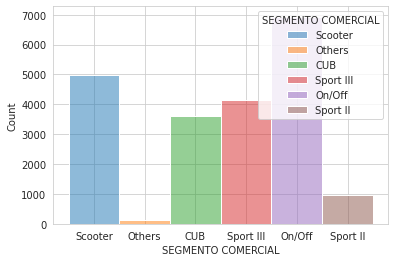

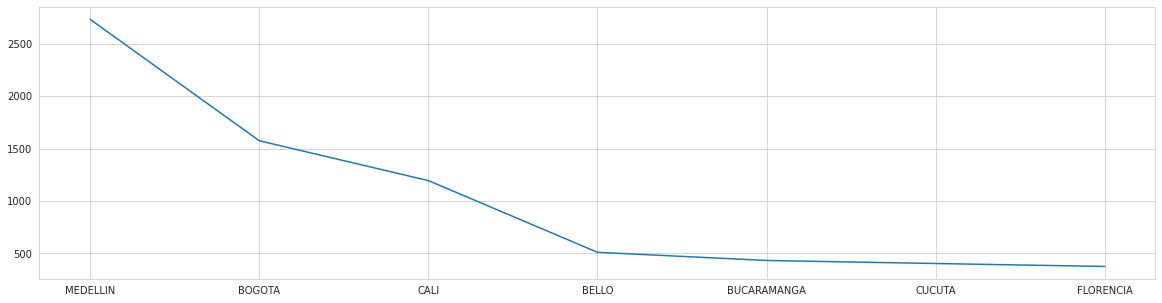

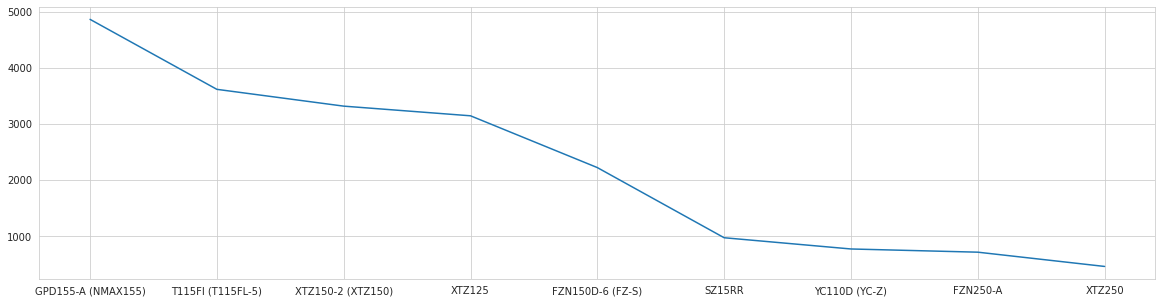

In [ ]:
Yamaha_sales = co.query("MARCA == 'YAMAHA'")

sns.histplot(data=Yamaha_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Yamaha_Top_town = Yamaha_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Yamaha_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Yamaha_Top_models = Yamaha_sales['LINEA'].value_counts()[:9]
Yamaha_Top_models.plot(ax = ax)

Yamaha, la marca líder del mercado este año cuenta con particiáción en todos los segmentos. Medellin es su plaza más improtante, seguida por Bogota y Cali. Los tres modelos más relevantes osn la Nmax, la T115 Fi y las XTZ (150 & 125). 

<AxesSubplot:>

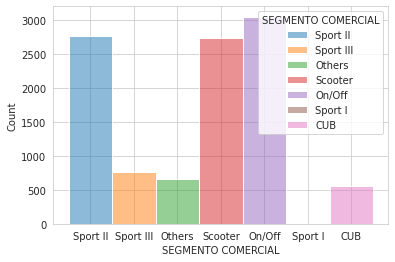

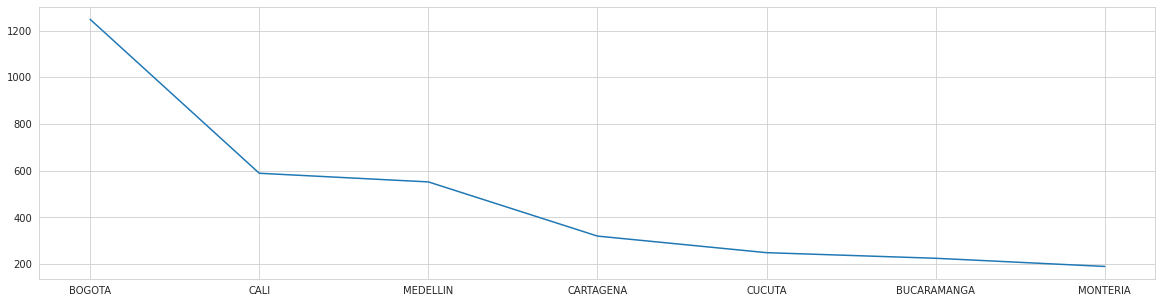

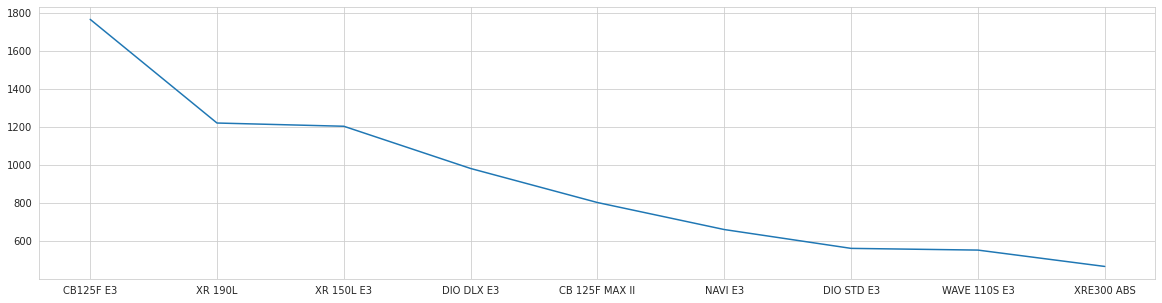

In [ ]:
Honda_sales = co.query("MARCA == 'HONDA'")

sns.histplot(data=Honda_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Honda_Top_town = Honda_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Honda_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Honda_Top_models = Honda_sales['LINEA'].value_counts()[:9]
Honda_Top_models.plot(ax = ax)

Honda tiene presencia importante en tres segmentos: Sport II, On/Off y Scooter. La principal ciudad de ventas es Bogota, seguida por Cali y Medellin y su principal modelo es la CB125. Las XR (190 y 150) ocupan el segundo y tercer lugar en las ventas de la marca.

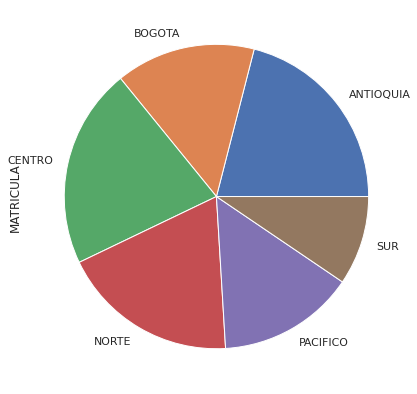

In [ ]:
datos2 = co.groupby('NUEVAS ZONAS').count()['MATRICULA']
fig,ax= plt.subplots(figsize = (10,7))
datos2.plot.pie()
plt.show()

Analisis: La zona centro es la mas representativa en cuanto a la venda de motos, seguida por Antioquia y Centro en tercer lugar. 

<AxesSubplot:xlabel='MES MI'>

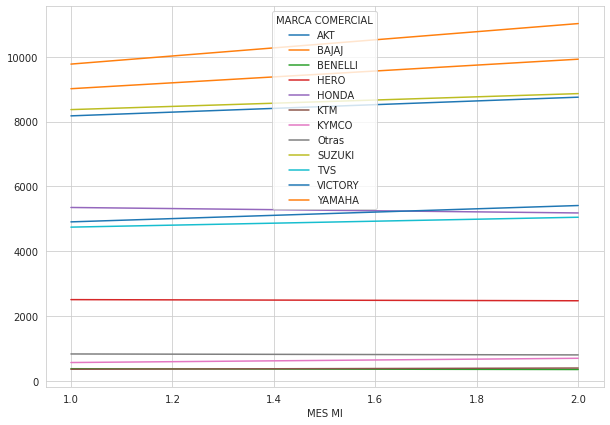

In [ ]:
tabla = co.groupby([pd.Grouper(key='MES MI'), 'MARCA COMERCIAL']).size().unstack()
fig, ax= plt.subplots(figsize = (10,7))
df_marcas = tabla.groupby('MES MI').sum()
df_marcas.plot(kind='line', ax = ax)

Analisis: A principios de año Bajaj tenía el liderazgo indiscutible del mercado, pero a finales se puede observar como Yamaha lo supera, ubicandose en el primer lugar. De forma similar se puede observar como AKT supera a AKT y toma el tercer lugar en diciembre. 

<AxesSubplot:>

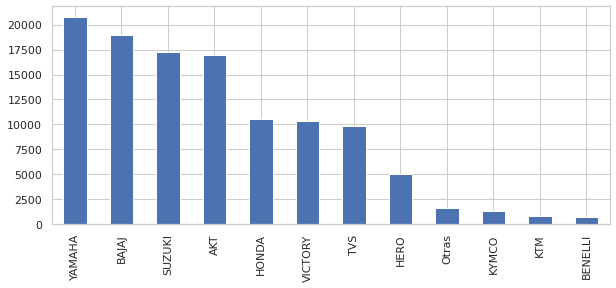

In [ ]:
fig, ax= plt.subplots(figsize = (10,4))
co['MARCA COMERCIAL'].value_counts().plot.bar(ax = ax)

Analisis: en el 2022, el TOP 3 de marcas que más vendiron motos en Colombia fueron Bajaj, Yamaha y AKT. 

In [ ]:
co['MARCA COMERCIAL'].value_counts()


YAMAHA     20793
BAJAJ      18936
SUZUKI     17231
AKT        16928
HONDA      10535
VICTORY    10320
TVS         9797
HERO        4987
Otras       1643
KYMCO       1275
KTM          767
BENELLI      738
Name: MARCA COMERCIAL, dtype: int64

<AxesSubplot:xlabel='SEGMENTO COMERCIAL', ylabel='DIA MI'>

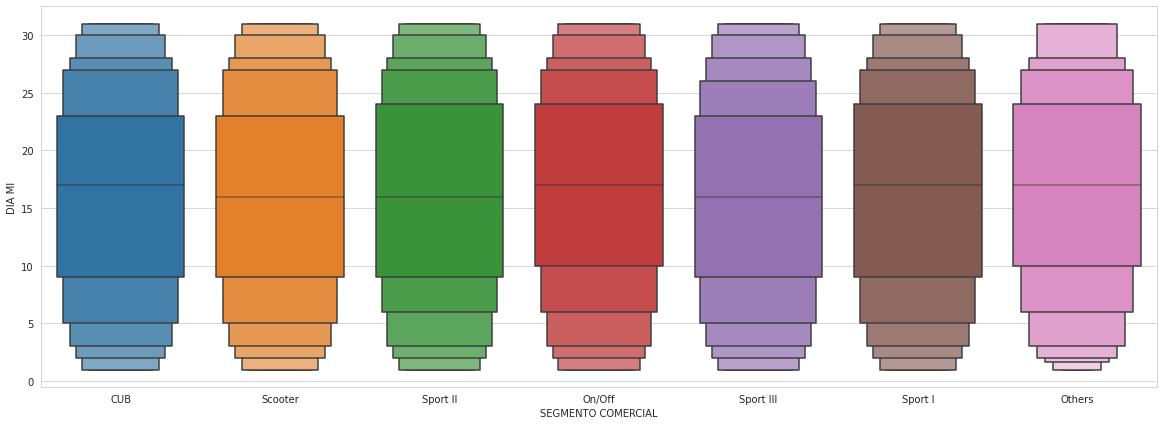

In [ ]:
fig, ax= plt.subplots(figsize = (20,7))
sns.boxenplot(data=co, x='SEGMENTO COMERCIAL', y="DIA MI", scale="linear")

En este gráfico se puede observar la distribución por dias de las ventas por segmento, y permite entender si algun segmento tiene alguna distribución diferente en el mes. De manera preliminar se puede observar que el segmento Sport I parece tener concentrada la mayorúa de sus ventas un poco más hacia el final del mes que el resto de segmentos, al igual que las motocicletas on/Off y las CUB.

<AxesSubplot:xlabel='MARCA COMERCIAL', ylabel='DIA MI'>

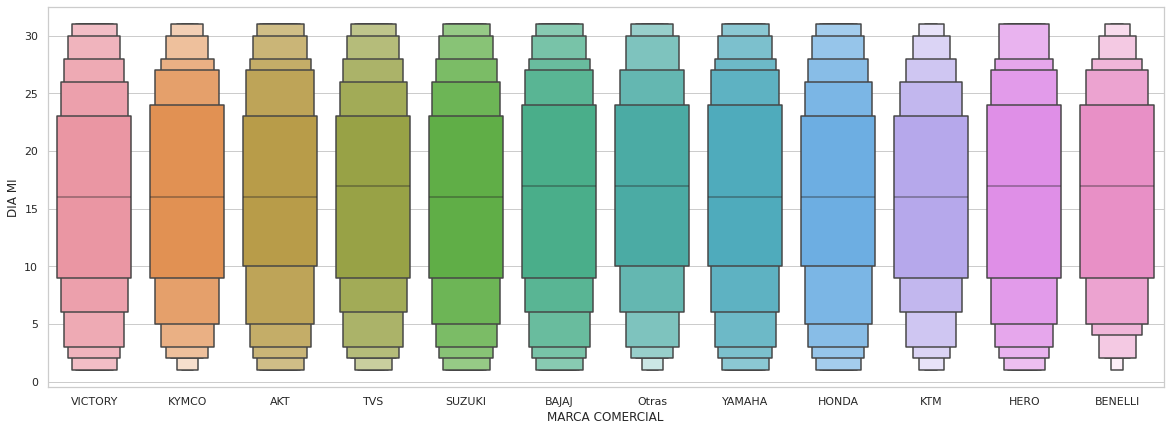

In [ ]:
fig, ax= plt.subplots(figsize = (20,7))
sns.boxenplot(data=co, x='MARCA COMERCIAL', y="DIA MI", scale="linear")

Al revisar la distrubión de los datos por dia, en el 2023, se puede observar que en general las marcas realizan la mayoría de sus matriculas después del 15 del mes. En particular llama la atención los quertiles superiores de hero, que muestran que la marca tiene una mayor proporción de sus ventas a final de mes frente a otras marcas. 

<AxesSubplot:xlabel='MARCA COMERCIAL', ylabel='DIA MI'>

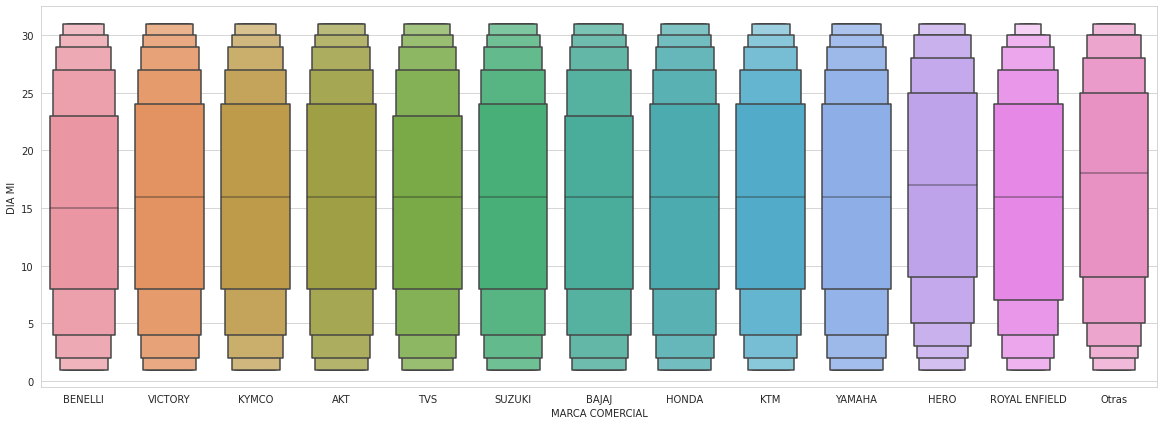

In [ ]:
fig, ax= plt.subplots(figsize = (20,7))
sns.boxenplot(data=co22, x='MARCA COMERCIAL', y="DIA MI", scale="linear")

para entender mejor el panoprama, analizamos el año anterior. Un mayor marco de tiempo permite observar mejor el comportamiento de los datos.

Benelli es la unica marca que parece tener una distribución alineada al mes, mientras que als demás marcas tienden a matricular después del 15. 

Hero nuevamente resalta, su mediana está por encima de las demás marcas, nostrando que la mayoría de ventas se registran a finales del mes en comparación a los demás.  

In [ ]:
print(Bajaj_sales['MATRICULA'].count())
print(Tvs_sales['MATRICULA'].count())
print(Hero_sales['MATRICULA'].count())

18936
9797
4987


Conclusiones: 

El análisis de los datos presentados muestra una serie de conclusiones sobre el mercado de motocicletas en Colombia. En primer lugar, se puede observar que las ventas no ocurren todos los días, además, se evidencia que durante los últimos 10 días del mes se venden más motos en comparación con los primeros 20 días, lo que sugiere la necesidad de implementar acciones específicas de ventas y marketing para esos días.

En cuanto a los segmentos de mercado, se destaca que los segmentos Sport II y Sport III son los más representativos en ventas, mientras que los segmentos CUB y Sport I mantienen volúmenes cercanos. Estos dos últimos son los segmentos más económicos del mercado, lo que sugiere una situación económica difícil para los consumidores que buscan motocicletas más baratas.

En términos de las marcas más importantes, Yamaha y Bajaj lideran el mercado, seguidas por AKT, Suzuki y Honda. Las ciudades más representativas del mercado son Bogotá, Medellín, Cali, Cúcuta, Cartagena, Barranquilla y Montería. Además, la AKT NKD125 es la motocicleta más vendida en Colombia, seguida por la Yamaha Nmax y la Bajaj Boxer CT100.

Cada marca tiene una presencia diferencial en diferentes segmentos de mercado y ciudades. Por ejemplo, la marca Hero tiene la mayoría de sus ventas en el segmento Sport I, el más económico del mercado, y en la ciudad de Cali. En contraste, Suzuki tiene una gran distribución de ventas en Bogotá y Cúcuta, mientras que Yamaha tiene una participación en todos los segmentos y una plaza más importante en Medellín. 

En cuanto a la distribución geográfica, se destaca que la zona Bogota (centro) es la más representativa en cuanto a la venta de motocicletas, seguida por Antioquia (Donde está Medellín). 

En resumen, el análisis de los datos permite observar las tendencias del mercado de motocicletas en Colombia, las preferencias de los consumidores y las estrategias que podrían aplicar las empresas para mejorar sus ventas. Es importante tener en cuenta las diferencias geográficas, los segmentos de mercado y los modelos más populares para adaptar las estrategias de marketing y ventas a las necesidades del mercado.